# Data Interpolation



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 



In [11]:
# ex17.1, Determine polynomial coefficients

xdata = np.array([300, 400, 500])
ydata = np.array([0.616, 0.525, 0.457])

A = np.zeros((3,3))
print(A)
for i in range(3):
    A[:,i] = xdata[:]**(2.-i)
print(A)
b = ydata
x = np.linalg.solve(A,b)
print(x)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[9.0e+04 3.0e+02 1.0e+00]
 [1.6e+05 4.0e+02 1.0e+00]
 [2.5e+05 5.0e+02 1.0e+00]]
[ 1.150e-06 -1.715e-03  1.027e+00]


In [14]:
# use polyfit 
order = 2
coef = np.polyfit(xdata,ydata,order)
print(coef)

[ 1.150e-06 -1.715e-03  1.027e+00]


In [16]:
# use polyval for interpolation
temperature = 350.
density = np.polyval(coef, temperature)
print(density)

0.5676249999999996


Text(0, 0.5, 'y')

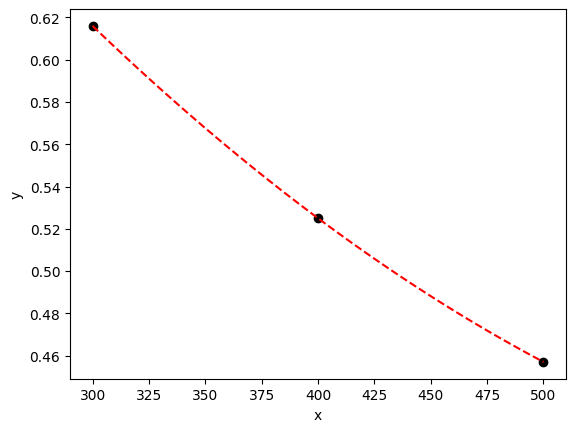

In [20]:
x = np.linspace(xdata[0],xdata[-1],101)
y = np.polyval(coef, x)
plt.scatter(xdata,ydata,c='k')
plt.plot(x,y,c='r',ls='--')
plt.xlabel('x')
plt.ylabel('y')

In [34]:
# ex 17.4 
xdata = np.array([1., 4., 6., 5.])
ydata = np.array([0., 1.386294, 1.791759, 1.609438])

# x[1,2,3] - x[0,1,2] 
dfdx = (ydata[1:] - ydata[0:-1])/(xdata[1:] - xdata[0:-1])
print(dfdx)

# x[2,3] - x[0,1] 
ddfdx = (dfdx[1:] - dfdx[0:-1])/(xdata[2:] - xdata[0:-2])
print(ddfdx)

# x[3] - x[0] 
dddfdx = (ddfdx[1:] - ddfdx[0:-1])/(xdata[3:] - xdata[0:-3])
print(dddfdx)

[0.462098  0.2027325 0.182321 ]
[-0.0518731 -0.0204115]
[0.0078654]


In [41]:
b0 = ydata[0] 
b1 = dfdx[0]
b2 = ddfdx[0]
b3 = dddfdx[0]
x1 = xdata[0]
x2 = xdata[1]
x3 = xdata[2]
f = lambda x: b0 + b1*(x-x1) + b2*(x-x1)*(x-x2) + b3*(x-x1)*(x-x2)*(x-x3)

f(2)

print('err_t = {0:8.2f}%'.format(np.abs(f(2) - np.log(2))/np.abs(np.log(2))*100))

err_t =     9.29%


/var/folders/hh/w5xjnck119d_h0x6gxztgrwr0000gn/T/ipykernel_73697/1911508635.py:3: RuntimeWarning: divide by zero encountered in log
  y_true =np.log(x)


Text(0, 0.5, 'y')

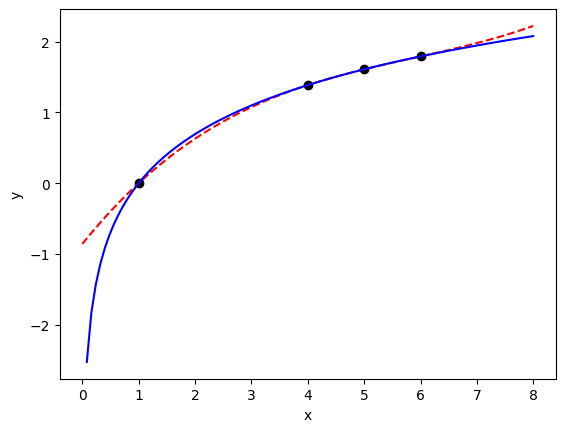

In [45]:
x = np.linspace(0.,8.,101)
y =f(x)
y_true =np.log(x)
plt.scatter(xdata,ydata,c='k')
plt.plot(x,y,c='r',ls='--')
plt.plot(x,y_true,c='b',ls='-')
plt.xlabel('x')
plt.ylabel('y')

In [46]:
def Newtint(x,y,xx):
    n = len(x)
    if (len(y)!=n):
        return 'x and y must be of same length'
    b = np.zeros((n,n))
    b[:,0] = np.transpose(y)

    for j in range(1,n):
        for i in range(n-j):
            b[i,j] = (b[i+1,j-1] - b[i,j-1])/(x[i+j]-x[i])
    
    xt = 1
    yint = b[0,0]
    for j in range(n-1):
        xt = xt * (xx-x[j])
        yint = yint + b[0,j+1]*xt 
    return yint 


In [47]:
x = np.array([1., 4., 6., 5])
y = np.log(x)
yi = Newtint(x,y,2.)
print(yi)

0.6287685789084135


In [58]:
# ex17.5 

xdata = np.array([0., 20., 40.])
ydata = np.array([3.85, 0.8, 0.212]) 

x1 = xdata[0]
x2 = xdata[1]
x3 = xdata[2]
y1 = ydata[0]
y2 = ydata[1]
y3 = ydata[2]

1.5625


Text(0, 0.5, 'y')

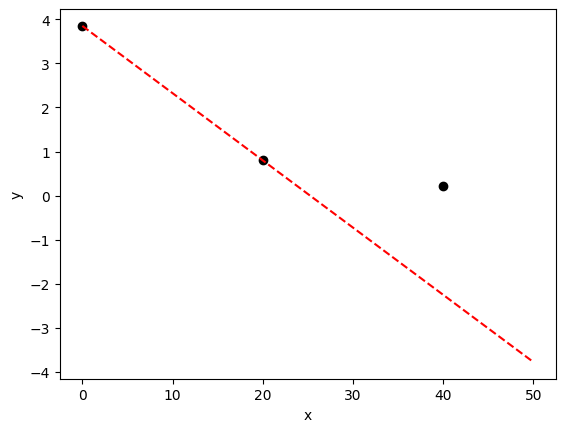

In [59]:
# 1st order Lagrange polynomial
N1 = lambda x: (x-x2)/(x1-x2)
N2 = lambda x: (x-x1)/(x2-x1)

f_linear = lambda x: N1(x)*y1 + N2(x)*y2

print(f_linear(15))

x = np.linspace(0.,50.,101)
y =f_linear(x)
plt.scatter(xdata,ydata,c='k')
plt.plot(x,y,c='r',ls='--')
plt.xlabel('x')
plt.ylabel('y')


1.3316875


Text(0, 0.5, 'y')

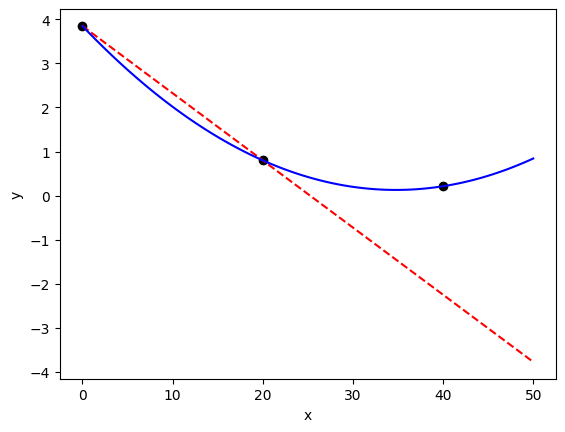

In [60]:
# 2nd order Lagrange polynomial
L1 = lambda x: ((x-x2)*(x-x3))/((x1-x2)*(x1-x3))
L2 = lambda x: ((x-x1)*(x-x3))/((x2-x1)*(x2-x3))
L3 = lambda x: ((x-x1)*(x-x2))/((x3-x1)*(x3-x2))

f_quadratic = lambda x: L1(x)*y1 + L2(x)*y2 + L3(x)*y3

print(f_quadratic(15))

x = np.linspace(0.,50.,101)
y =f_linear(x)
y2 =f_quadratic(x)
plt.scatter(xdata,ydata,c='k')
plt.plot(x,y,c='r',ls='--')
plt.plot(x,y2,c='b',ls='-')
plt.xlabel('x')
plt.ylabel('y')


In [61]:
# Lagrange

def Lagrange(x,y,xx):
    n = len(x)
    if (len(y) !=n):
        return 'x and y must be of same length'
    s = 0 
    for i in range(n):
        product = y[i]
        for j in range(n):
            if i !=j:
                product = product * (xx - x[j])/(x[i] - x[j])
        s = s + product 
    yint = s 
    return yint 

T = np.array([-40. ,0., 20., 50.])
rho = np.array([1.52, 1.29, 1.2, 1.09])
rhoint = Lagrange(T,rho, 15.)
print(rhoint)

1.2211284722222222


In [63]:
# ex17.6

# 7th order polynomial gives a warning 
yr = np.arange(1920., 2020., 10.)
pop= np.array([106.02, 123.2, 132.17, 151.33, 179.32, 203.21, 226.55, 248.71, 281.42, 308.75])
coef = np.polyfit(yr,pop, 7)
print(coef)

[-3.37420665e-12  3.31684075e-08 -1.17330274e-04  1.27791724e-01
  2.53483221e+02 -8.94429677e+05  9.76317187e+08 -3.83759864e+11]


/var/folders/hh/w5xjnck119d_h0x6gxztgrwr0000gn/T/ipykernel_73697/2625453987.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(yr,pop, 7)


In [79]:
# scale transformation
print(np.mean(yr))
print(np.std(yr))
sse = np.sum((yr - np.mean(yr))**2.)
sx = np.sqrt(sse/(len(yr)-1))
print(sx)

z  = (yr - np.mean(yr)) / sx 

# now we can compute the coefficients without warnings
coef = np.polyfit(z,pop, 9)
print(coef)


1965.0
28.722813232690143
30.276503540974915
[ -19.68475023   -2.205583     84.84744564   -1.10389791 -110.64736538
   24.17057751   41.18181059  -17.1368194    71.28801608  191.7144133 ]


In [82]:
z20 = (2020. - np.mean(yr))/sx 
pop20 = np.polyval(coef, z20)
print(pop20)

f = lambda x: np.polyval(coef, x)

-417.0500000000061


Text(0, 0.5, 'y')

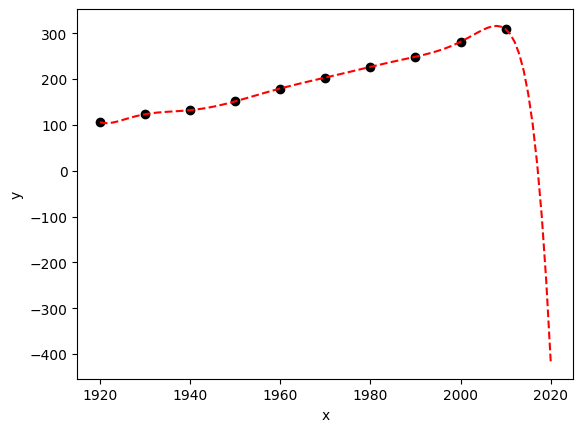

In [88]:

x = np.linspace(1920.,2020.,101)
z = (x - np.mean(yr))/sx
y =f(z)
plt.scatter(yr,pop,c='k')
plt.plot(x,y,c='r',ls='--')
plt.xlabel('x')
plt.ylabel('y')


In [104]:
# ex17.7


xdata = np.linspace(-1., 1., 5)
f_true = lambda x: 1./(1.+25.*x**2)
ydata = f_true(xdata)

# 4th order polynomial
coef4 = np.polyfit(xdata,ydata,4)
f_4th = lambda x: np.polyval(coef4,x)



Text(0, 0.5, 'y')

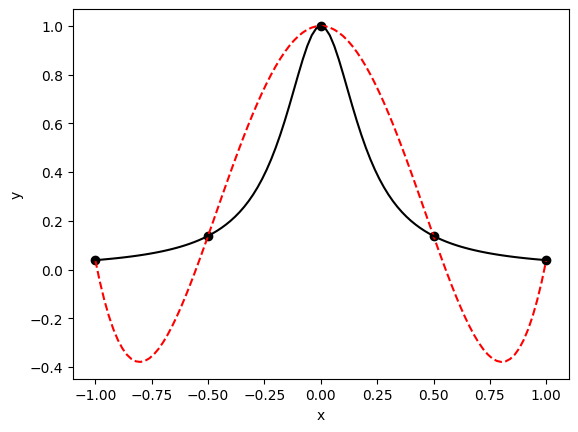

In [105]:
x = np.linspace(-1., 1., 101)
y_4th = f_4th(x)
y_true = f_true(x)

plt.scatter(xdata,ydata,c='k')
plt.plot(x,y_4th,c='r',ls='--')
plt.plot(x,y_true,c='k',ls='-')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

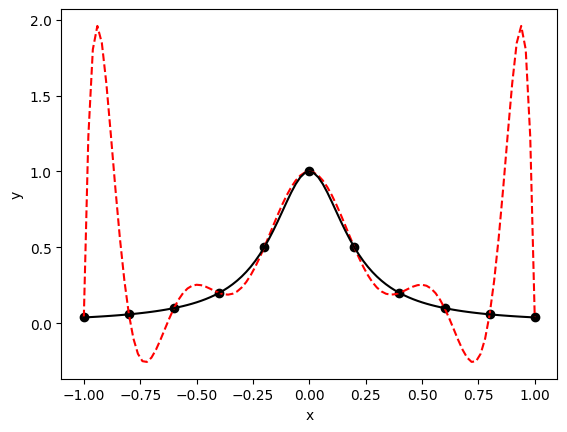

In [106]:
# 10th order polynomial
xdata = np.linspace(-1., 1., 11)
f_true = lambda x: 1./(1.+25.*x**2)
ydata = f_true(xdata)
coef10 = np.polyfit(xdata,ydata,10)
f_10th = lambda x: np.polyval(coef10,x)


x = np.linspace(-1., 1., 101)
y_10th = f_10th(x)
y_true = f_true(x)

plt.scatter(xdata,ydata,c='k')
plt.plot(x,y_10th,c='r',ls='--')
plt.plot(x,y_true,c='k',ls='-')
plt.xlabel('x')
plt.ylabel('y')